<a href="https://colab.research.google.com/github/jpisani86/finance_projects/blob/main/Berkshire_Carhart_4_risk_factors_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Carhart model is a multifactor model that is widely used to evaluate the performance of investment portfolios. This model is based on four key factors, which include market risk, size, value, and momentum.
1. Market risk is the most well-known factor in the Carhart model. It represents the risk that is associated with investing in the overall stock market. Market risk is measured by the beta coefficient, which reflects the degree to which a stock's price fluctuates in response to changes in the market. A beta of 1 indicates that the stock moves in sync with the market, while a beta greater than 1 indicates that the stock is more volatile than the market. On this model, it is basically the returns on the market index (s&p 500) minus the rist free rate.
2. The size factor -SMB-: The second factor in the Carhart Model is the size factor. This factor measures the difference in returns between small-cap and large-cap stocks. small-cap stocks are generally considered riskier than large-cap stocks because they are less established and have less liquidity. As a result, investors demand a higher return for investing in small-cap stocks. On thi model it is basically the return of an equity weighted portfolio of the smallest quantile, minus the returns of an equally weighted portfolio composed of the biggest quantile of the biggest firms.
3. The Value Factor -HML- (book-to-market factor)0:1 The third factor in the Carhart Model is the value factor. This factor measures the difference in returns between value stocks and growth stocks. Value stocks are stocks that are considered undervalued by the market and have a low price-to-earnings ratio.
4. The momentum factor -UMD-: The fourth and final factor in the Carhart Model is the momentum factor. This factor measures the difference in returns between stocks that have performed well in the past and stocks that have performed poorly.

***SMB is a zero-investment portfolio that is long on small capitalization (cap) stocks and short on big cap stocks. Similarly, HML is a zero-investment portfolio that is long on high book-to-market (B/M) stocks and short on low B/M stocks, and UMD is a zero-cost portfolio that is long previous 12-month return winners and short previous 12-month loser stocks.

In [4]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from statsmodels.api import OLS

In [5]:
pdr.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [6]:
start = '1926-01-01'

In [7]:
# select the data frame with the Fama and French 3 risk factors
ff = pdr.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq = 'M', start=start).read()

In [8]:
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2023-09   -5.24 -2.51  1.52  0.43
 2023-10   -3.19 -3.87  0.19  0.47
 2023-11    8.84 -0.02  1.64  0.44
 2023-12    4.85  6.34  4.93  0.43
 2024-01    0.70 -5.07 -2.39  0.47
 
 [1171 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2019   28.28  -6.14 -10.46  2.15
 2020   23.66  13.18 -46.67  0.45
 2021   23.56  -3.89  25.49  0.04
 2022  -21.60  -6.95  25.81  1.43
 2023   21.68  -3.23 -13.59  4.95
 
 [97 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

In [9]:
# Select only the data frame with the monthly returns
ff_df = ff[0]

In [10]:
ff_df.tail()

,Mkt-RF,SMB,HML,RF
Date,,,,
2023-09,-5.24,-2.51,1.52,0.43
2023-10,-3.19,-3.87,0.19,0.47
2023-11,8.84,-0.02,1.64,0.44
2023-12,4.85,6.34,4.93,0.43
2024-01,0.70,-5.07,-2.39,0.47


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

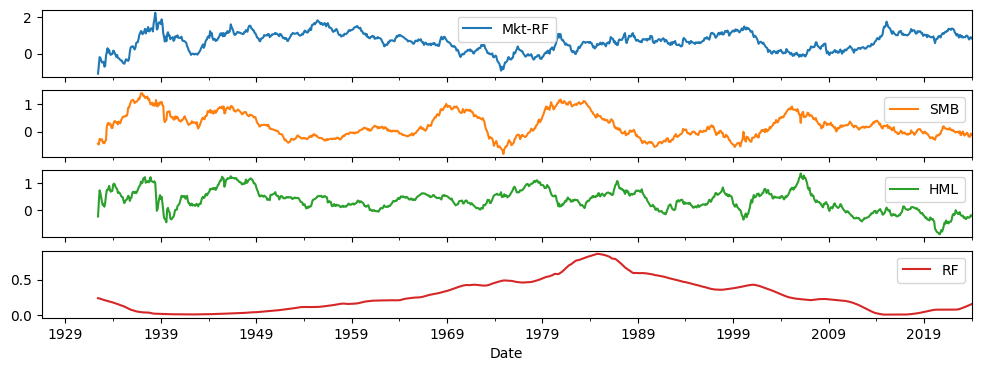

In [11]:
# subplots of data series
# smoothing the time series by taking the rolling 72 months mean
ff_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

In [14]:
# Selecting the data frame for the momentum risk factor to construct the Carhart 4 factors model
ff_mom_df = pdr.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq = 'M', start=start).read()[0]

array([<Axes: xlabel='Date'>], dtype=object)

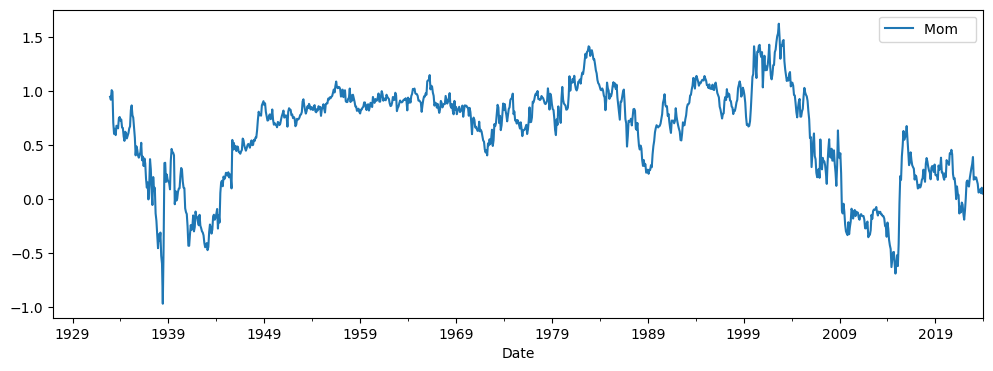

In [15]:
# Graph of smoothed data
ff_mom_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

In [16]:
# Merger of the Fama and French Data frame and the moementum factor
ffac_merged_df = pd.merge(ff_df, ff_mom_df, on='Date', how= 'inner',sort=True,indicator=False,validate='one_to_one')

In [17]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2023-09,-5.24,-2.51,1.52,0.43,0.26
2023-10,-3.19,-3.87,0.19,0.47,1.73
2023-11,8.84,-0.02,1.64,0.44,2.75


In [18]:
# workaround to solve issue to download the data for Berkshire Hathaway from pandas dara reader
yf.pdr_override()
BRH_data = pdr.data.get_data_yahoo('BRH', start=start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%%**********************]  1 of 1 completed


In [19]:
BRH_data

Date
2000-01-31             NaN
2000-02-29   -1.275797e-01
2000-03-31    2.150538e-01
2000-04-30    1.628319e-01
2000-05-31   -2.587519e-02
                  ...     
2017-09-30    0.000000e+00
2017-10-31    0.000000e+00
2017-11-30    0.000000e+00
2017-12-31    2.555443e+06
2018-01-31   -9.999996e-01
Freq: M, Name: Adj Close, Length: 217, dtype: float64

In [20]:
BRH_df  = BRH_data.to_frame()

In [21]:
BRH_df

,Adj Close
Date,
2000-01-31,NaN
2000-02-29,-1.275797e-01
2000-03-31,2.150538e-01
2000-04-30,1.628319e-01
2000-05-31,-2.587519e-02
...,...
2017-09-30,0.000000e+00
2017-10-31,0.000000e+00
2017-11-30,0.000000e+00


In [22]:
# The below is to solve the issue that the 2 data frames -berkshire and merged factors- are not on the same format.
# We start by adding a new column to the BRH_df that will convert the dates (index) to strings
BRH_df['str_date'] = BRH_df.index.astype(str)
# Then we add an extra column 'dt_date' where we will format the date to '%Y-%m'
BRH_df['dt_date'] = pd.to_datetime(BRH_df['str_date']).dt.strftime('%Y-%m')
BRH_df

,Adj Close,str_date,dt_date
Date,,,
2000-01-31,NaN,2000-01-31,2000-01
2000-02-29,-1.275797e-01,2000-02-29,2000-02
2000-03-31,2.150538e-01,2000-03-31,2000-03
2000-04-30,1.628319e-01,2000-04-30,2000-04
2000-05-31,-2.587519e-02,2000-05-31,2000-05
...,...,...,...
2017-09-30,0.000000e+00,2017-09-30,2017-09
2017-10-31,0.000000e+00,2017-10-31,2017-10
2017-11-30,0.000000e+00,2017-11-30,2017-11


In [23]:
# We do the same as above to align format. Otherwise the merger of the 2 dataframes will not work.
ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date'] = pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')

In [24]:
BRH_ffm_merge_df = pd.merge(BRH_df, ffac_merged_df, how='inner',on='dt_date',sort=True,copy=True,indicator=False,validate='one_to_one')

In [25]:
BRH_ffm_merge_df

,Adj Close,str_date_x,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date_y
0,NaN,2000-01-31,2000-01,-4.74,5.77,-1.88,0.41,1.92,2000-01
1,-1.275797e-01,2000-02-29,2000-02,2.45,21.36,-9.59,0.43,18.20,2000-02
2,2.150538e-01,2000-03-31,2000-03,5.20,-17.20,8.13,0.47,-6.83,2000-03
3,1.628319e-01,2000-04-30,2000-04,-6.40,-6.68,7.26,0.46,-8.39,2000-04
4,-2.587519e-02,2000-05-31,2000-05,-4.42,-6.05,4.75,0.50,-8.98,2000-05
...,...,...,...,...,...,...,...,...,...
212,0.000000e+00,2017-09-30,2017-09,2.51,4.47,3.14,0.09,-1.32,2017-09
213,0.000000e+00,2017-10-31,2017-10,2.25,-1.94,0.20,0.09,4.27,2017-10
214,0.000000e+00,2017-11-30,2017-11,3.12,-0.55,-0.03,0.08,-0.87,2017-11
215,2.555443e+06,2017-12-31,2017-12,1.06,-1.32,0.06,0.09,-1.54,2017-12


In [26]:
# Dropping the unnecesary extra columns
BRH_ffm_merge_df.drop(columns=['str_date_x', 'str_date_y'], inplace=True)

In [27]:
BRH_ffm_merge_df.rename(columns={'Adj Close': 'Berkshire Hathaway Inc'}, inplace = True)

In [28]:
# Calculating the excess return on our dependent variable ( Return on Berkshire - Risk free)
BRH_ffm_merge_df['BRH_RF'] = BRH_ffm_merge_df['Berkshire Hathaway Inc']*100 - BRH_ffm_merge_df['RF']

In [29]:
BRH_ffm_merge_df.dropna(axis=0, inplace=True)

In [30]:
BRH_ffm_merge_df.rename(columns={'Mom   ': 'Mom'}, inplace = True)
# Fitting the linear regression.
results = OLS(BRH_ffm_merge_df['BRH_RF'],BRH_ffm_merge_df[['Mkt-RF', 'SMB', 'HML','Mom']], missing='drop' ).fit()

In [ ]:
BRH_ffm_merge_df

,Berkshire Hathaway Inc,dt_date,Mkt-RF,SMB,HML,RF,Mom,BRH_RF
1,-1.275797e-01,2000-02,2.45,21.36,-9.59,0.43,18.20,-1.318797e+01
2,2.150538e-01,2000-03,5.20,-17.20,8.13,0.47,-6.83,2.103538e+01
3,1.628319e-01,2000-04,-6.40,-6.68,7.26,0.46,-8.39,1.582319e+01
4,-2.587519e-02,2000-05,-4.42,-6.05,4.75,0.50,-8.98,-3.087519e+00
5,-1.265625e-01,2000-06,4.64,12.84,-8.42,0.40,16.60,-1.305625e+01
...,...,...,...,...,...,...,...,...
212,0.000000e+00,2017-09,2.51,4.47,3.14,0.09,-1.32,-9.000000e-02
213,0.000000e+00,2017-10,2.25,-1.94,0.20,0.09,4.27,-9.000000e-02
214,0.000000e+00,2017-11,3.12,-0.55,-0.03,0.08,-0.87,-8.000000e-02
215,2.555443e+06,2017-12,1.06,-1.32,0.06,0.09,-1.54,2.555443e+08


In [31]:
# Showing the output of regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 BRH_RF   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):              0.016
Method:                 Least Squares   F-statistic:                              1.903
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                       0.111
Time:                        15:54:33   Log-Likelihood:                         -4030.2
No. Observations:                 216   AIC:                                      8068.
Df Residuals:                     212   BIC:                                      8082.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF      8.192e+05   5.48e+05      1.495      0.137   -2.61e+05     1.9e+06
SMB        -1.411e+06   6.92e+05     -2.039      0.043   -2.77e+06   -4.71e+04
HML        -8.016e+05   6.91e+05     -1.161      0.247   -2.16e+06     5.6e+05
Mom         7.714e+05   4.29e+05      1.799      0.073   -7.37e+04    1.62e+06
==============================================================================
Omnibus:                      399.442   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108113.249
Skew:                          10.161   Prob(JB):                         0.00
Kurtosis:                     110.701   Cond. No.                         2.16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
import statsmodels.tools

In [33]:
# Adding a constant
BRH_ffm_merge_df_constant = statsmodels.tools.add_constant(BRH_ffm_merge_df, prepend=True)

In [34]:
BRH_ffm_merge_df_constant

,const,Berkshire Hathaway Inc,dt_date,Mkt-RF,SMB,HML,RF,Mom,BRH_RF
1,1.0,-1.275797e-01,2000-02,2.45,21.36,-9.59,0.43,18.20,-1.318797e+01
2,1.0,2.150538e-01,2000-03,5.20,-17.20,8.13,0.47,-6.83,2.103538e+01
3,1.0,1.628319e-01,2000-04,-6.40,-6.68,7.26,0.46,-8.39,1.582319e+01
4,1.0,-2.587519e-02,2000-05,-4.42,-6.05,4.75,0.50,-8.98,-3.087519e+00
5,1.0,-1.265625e-01,2000-06,4.64,12.84,-8.42,0.40,16.60,-1.305625e+01
...,...,...,...,...,...,...,...,...,...
212,1.0,0.000000e+00,2017-09,2.51,4.47,3.14,0.09,-1.32,-9.000000e-02
213,1.0,0.000000e+00,2017-10,2.25,-1.94,0.20,0.09,4.27,-9.000000e-02
214,1.0,0.000000e+00,2017-11,3.12,-0.55,-0.03,0.08,-0.87,-8.000000e-02
215,1.0,2.555443e+06,2017-12,1.06,-1.32,0.06,0.09,-1.54,2.555443e+08


In [35]:
# Re running model with constant included
results = OLS(BRH_ffm_merge_df_constant['BRH_RF'],BRH_ffm_merge_df_constant[['const','Mkt-RF', 'SMB', 'HML','Mom']], missing='drop' ).fit()

In [36]:
# Final results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BRH_RF   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.950
Date:                Mon, 11 Mar 2024   Prob (F-statistic):              0.103
Time:                        15:54:43   Log-Likelihood:                -4029.1
No. Observations:                 216   AIC:                             8068.
Df Residuals:                     211   BIC:                             8085.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.114e+06   2.14e+06      1.454      0.148   -1.11e+06    7.34e+06
Mkt-RF      7.213e+05   5.51e+05      1.309      0.192   -3.65e+05    1.81e+06
SMB        -1.461e+06   6.91e+05     -2.116      0.036   -2.82e+06   -9.96e+04
HML        -9.395e+05   6.95e+05     -1.351      0.178   -2.31e+06    4.31e+05
Mom         7.142e+05   4.29e+05      1.663      0.098   -1.32e+05    1.56e+06
==============================================================================
Omnibus:                      399.223   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107824.432
Skew:                          10.151   Prob(JB):                         0.00
Kurtosis:                     110.556   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interpretation of regression results
1) The low R-square indicates that not much of the variation of the dependent variable (Berkshire) can be explained by the independent variables.

2) The relatively low value of the F-test (1.950) indicates that all the factor loading may not be statistically different than 0

3) The low t statistic values indicate that we fail to reject the null hypothesis that independent variables = 0

4) out of all 4 independent variables, only SMB may have some explanatory power. Berkshire has a negative coefficient (-2.116), indicating that the stock is more exposed to big cap than it is to small cap.

# Testing of Linear regression assumptions
1) The Durbin-Watson of around 2 (2.017) indicates that there is no auto-correlation of the residuals.

2) The high levels of skew and kurtosis may indicate that the data is not normally distributed.

<ipython-input-38-05519f4c77ca>:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['dt_date'], dtype='object')
  BRH_ffm_merge_df_constant.rolling(72).mean().plot(subplots=True, figsize=(12,4))


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

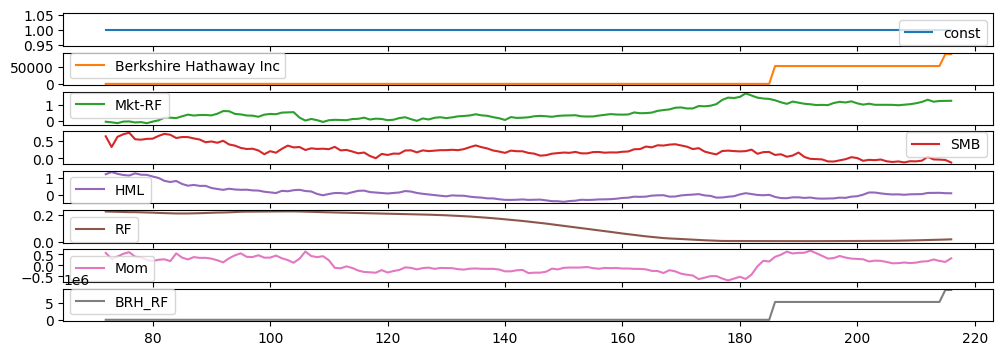

In [38]:
# subplots of all data series
# smoothing the time series by taking the rolling 72 months mean
BRH_ffm_merge_df_constant.rolling(72).mean().plot(subplots=True, figsize=(12,4))